## Solución Prueba 2. Análisis de los crímenes en la Ciudad de Nueva York


**Alumnos:** Tania Torres, Sergio Zepeda y Julio Valdés 

**Nombre grupo:** z-ju

**Profesor:** Gabriel Tamayo L.

**Generación:** G5

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones y detenciones realizadas por le departamento de policia de NY en la vía pública. El diccionario de atributos se encuentra en el archivo 2009 SQF File Spec.xlsx. Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumén de datos reales.


### OBJETIVOS:
- Parte 1:  Generar un modelo predictivo que condicional a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no.
- Parte 2: Generar al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta

### MÉTRICAS A UTILIZAR:

* Debido a que corresponde a un problema de **clasificación**, utilizaremos las métricas del reporte de clasificación: **recall, precision y f1 score, además de la curva roc** para evaluar el desempeño de cada uno de los modelos
<br><br>

### OBJETIVOS:
- Parte 1:  Generar un modelo predictivo que condicional a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no.
- Parte 2: Generar al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta

### PREPROCESAMIENTO:

Para lograr los objetivos planteados, se debera realizar una etapa de preprocesamiento para parear la información contenida en ambos archivos de datos entregados. Para esto realizaremos los siguientes pasos:

- Analisis exploratorio de los datos.
- Comparación de columnas existentes y tipos de datos de cada atributo, con el fin de encontrar las diferencias entre ambos.
- Normalización del tipo de dato de atributos seleccionados
- Comparación de columnas de ambos dataframe y eliminacion de columnas diferentes.
- Visualizacion de Datos Perdidos y eliminación.
- Identificación de columnas que presentan diferencias en sus valores
- Selección de registros que contengan datos comunes (en ambos dataframe) de los atributos identificados
- Analisis exploratorio luego del preprocesamiento


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preproc_nyc_sqf as preproc
import missingno as msngo

In [ ]:
df_2009=pd.read_csv('2009_1perc.csv').drop('Unnamed: 0', axis=1)
df_2010=pd.read_csv('2010_1perc.csv').drop('Unnamed: 0', axis=1)


## Análisis exploratorio

In [3]:
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2010.shape[0],df_2010.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5812, Cantidad de columnas: 111
DATAFRAME 2010: Cantidad de Registros:6013, Cantidad de columnas: 111


In [4]:
print('DATAFRAME 2009 ')
print(df_2009['arstmade'].value_counts('%'))
print('-'*50)
print('DATAFRAME 2010')
print(df_2010['arstmade'].value_counts('%'))
print('-'*50)

DATAFRAME 2009 
N    0.940124
Y    0.059876
Name: arstmade, dtype: float64
--------------------------------------------------
DATAFRAME 2010
N    0.933477
Y    0.066523
Name: arstmade, dtype: float64
--------------------------------------------------


Text(0.5, 1.0, 'df 2010')

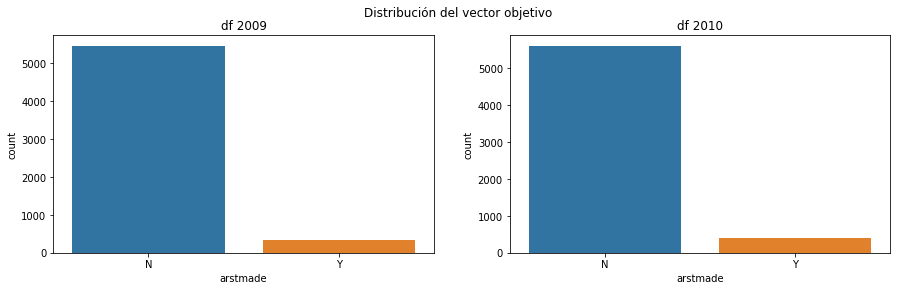

In [5]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
fig.suptitle('Distribución del vector objetivo')
ax1.set_title("df 2009")
sns.countplot(df_2009['arstmade'], label = 'Clase', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(df_2010['arstmade'], label = 'Clase', ax=ax2)
ax2.set_title("df 2010")

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Análisis exploratorio</strong></u></b> 
    
- Como se puede observar, en nuestro Dataframe de entrenamiento (df_2009) y el de validación (df_2010) cuentan con 111 columnas y 5812, 6013 registros respectivamente.
- El vector objetivo de esta sección corresponde al atributo arstmade, donde sus valores nos indican si se efectuó arresto o no.
- Al visualizar gráficamente el atributo arstmade en el df de entrenamiento (2009) y validación (2010), se puede observar que la distribución de las clases (Y, N) no es balanceada, predominando en ambos casos los casos donde no se efectua el arresto(N).


**DATAFRAME 2009** 
- **N: 94%**
- **Y: 0.06%**

**DATAFRAME 2010**
- **N: 93.3%**
- **Y: 0,07%**

</div>

***

## Preprocesamiento de los dataframe

#### 1.- Comparación de DataFrames: Se observarán las columnas existentes en ambos dataframes y el tipo de datos de cada atributo, con el de encontrar las diferencias entre ambos

In [6]:
typeData_col_09=[]
typeData_col_10=[]
columnas_distintas =[]
object_col =[]
dic_var = {}
for i,c in df_2009.iteritems():
    print('-'*30)
    print('Nombre de Columna: {}'.format(i))
    print('Tipo de dato df_2009:{}'.format(df_2009[i].dtype))
    if i in df_2010.columns:

        print('Tipo de dato df_2010:{}'.format(df_2010[i].dtype))
        print('-'*30)
        
        if(df_2009[i].dtype!=df_2010[i].dtype):
            if i in df_2009.columns:
                typeData_col_09.append(df_2009[i].dtype)
            if i in df_2010.columns:
                typeData_col_10.append(df_2010[i].dtype)
            columnas_distintas.append(i)
        else:
            if df_2009[i].dtype=='object':
                object_col.append(i)
    else:
            print('Tipo de dato df_2010:NONE')


------------------------------
Nombre de Columna: year
Tipo de dato df_2009:int64
Tipo de dato df_2010:int64
------------------------------
------------------------------
Nombre de Columna: pct
Tipo de dato df_2009:int64
Tipo de dato df_2010:int64
------------------------------
------------------------------
Nombre de Columna: ser_num
Tipo de dato df_2009:int64
Tipo de dato df_2010:int64
------------------------------
------------------------------
Nombre de Columna: datestop
Tipo de dato df_2009:int64
Tipo de dato df_2010:int64
------------------------------
------------------------------
Nombre de Columna: timestop
Tipo de dato df_2009:int64
Tipo de dato df_2010:int64
------------------------------
------------------------------
Nombre de Columna: recstat
Tipo de dato df_2009:object
Tipo de dato df_2010:object
------------------------------
------------------------------
Nombre de Columna: inout
Tipo de dato df_2009:object
Tipo de dato df_2010:object
------------------------------
--

#### 2.- Visualización de las columnas que presentan diferencia en el tipo de dato

In [7]:
dic_var={'Columna':columnas_distintas,'tipoDato2009':typeData_col_09,'tipoDato2010':typeData_col_10}
df_columnas_distintas = pd.DataFrame(dic_var)
df_columnas_distintas

,Columna,tipoDato2009,tipoDato2010
0,perobs,float64,int64
1,addrpct,int64,object
2,linecm,int64,object
3,detailcm,int64,object


#### 3.- Normalización de las diferencia del tipo de dato

In [8]:
typedata2009_col_corr = []
typedata2010_col_corr=[]

for i in df_columnas_distintas['Columna']:
    df_2010[i] =pd.to_numeric(df_2010[i], errors='coerce',downcast='float')
    df_2009[i] =pd.to_numeric(df_2009[i], errors='coerce',downcast='float')
    typedata2009_col_corr.append(df_2009[i].dtype)
    typedata2010_col_corr.append(df_2010[i].dtype)
    

dic_var={'Columna':columnas_distintas,'tipoDato2009':typedata2009_col_corr,'tipoDato2010':typedata2010_col_corr}
df_columnas_distintas = pd.DataFrame(dic_var)
df_columnas_distintas

,Columna,tipoDato2009,tipoDato2010
0,perobs,float32,float32
1,addrpct,float32,float32
2,linecm,float32,float32
3,detailcm,float32,float32


#### 4.- Normalización de atributos

In [9]:
df_2009 = preproc.create_suitable_dataframe(df_2009)
df_2010 = preproc.create_suitable_dataframe(df_2010)

In [10]:
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2010.shape[0],df_2010.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5812, Cantidad de columnas: 74
DATAFRAME 2010: Cantidad de Registros:6013, Cantidad de columnas: 74


#### 5.- Comparación de los valores de cada atributo

In [11]:
lista_aux=[]
for i,c in df_2009.iteritems():
    if(df_2009[i].dtype=='object'):
        print('-'*50)
        print('df_2009')
        print('Columna:{}, Lista Valores'.format(i),df_2009[i].nunique())
        print('df_2010')
        if(i in df_2010.columns):
            print('Columna:{}, Lista Valores'.format(i),df_2010[i].nunique())
            print('-'*50)


--------------------------------------------------
df_2009
Columna:recstat, Lista Valores 2
df_2010
Columna:recstat, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:inout, Lista Valores 2
df_2010
Columna:inout, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:trhsloc, Lista Valores 4
df_2010
Columna:trhsloc, Lista Valores 3
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:typeofid, Lista Valores 4
df_2010
Columna:typeofid, Lista Valores 4
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:explnstp, Lista Valores 2
df_2010
Columna:explnstp, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:othpers, List

Columna:rf_knowl, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:ac_stsnd, Lista Valores 2
df_2010
Columna:ac_stsnd, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:ac_other, Lista Valores 2
df_2010
Columna:ac_other, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:sb_hdobj, Lista Valores 2
df_2010
Columna:sb_hdobj, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:sb_outln, Lista Valores 2
df_2010
Columna:sb_outln, Lista Valores 2
--------------------------------------------------
--------------------------------------------------
df_2009
Columna:sb_admis, Lista Valores 2
df_2010
Columna:sb_admis, Lista Valores 2
------------------------------------

#### 6.- Identificación de diferencias entre los dataframes

In [12]:
col_eq_2009 =[]
col_dif_2009=[]

for i,c in df_2009.iteritems():
    if i in df_2010.columns:
         col_eq_2009.append(i)
    else:
          col_dif_2009.append(i)

col_dif_2009

['asltweap', 'post']

In [13]:
col_eq_2010=[]
col_dif_2010=[]

for i,c in df_2010.iteritems():
    if i in df_2009.columns:
         col_eq_2010.append(i)
    else:
          col_dif_2010.append(i)

col_dif_2010

['addrtyp', 'dettypcm']

#### 7.- Eliminación de columnas diferentes

In [14]:
df_2009.drop(col_dif_2009, axis=1,inplace=True)
df_2010.drop(col_dif_2010, axis=1,inplace=True)

In [15]:
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2010.shape[0],df_2010.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5812, Cantidad de columnas: 72
DATAFRAME 2010: Cantidad de Registros:6013, Cantidad de columnas: 72


#### 8.- Reemplazo de valores en blanco por datos perdidos

In [16]:
df_2009=df_2009.replace(r'^\s*$', np.nan, regex=True)
df_2010=df_2010.replace(r'^\s*$', np.nan, regex=True)

In [17]:
def missing_values (data,porcentaje):
    columns_isna =[]
    print('Valores de datos perdidos')
    print('----------------------------')
    for name, serie in data.iteritems():
        if(serie.isna().value_counts('%')[0] != 1.0):
            if serie.isna().value_counts('%')[1].round(4)>porcentaje:
                columns_isna.append(name)
                print ('-',name,': ',serie.isna().value_counts('%')[1].round(4) )
    print('----------------------------')   
    return columns_isna


#### 9.- Identificación  de aquellas columnas con mayor cantidad de valores perdidos 

In [18]:
col_2009=[]
col_2010=[]

col_2009=missing_values(df_2009,0.5)
col_2010=missing_values(df_2010,0.5)

Valores de datos perdidos
----------------------------
- officrid :  0.9854
- offverb :  0.7844
- offshld :  0.7235
- beat :  0.6232
----------------------------
Valores de datos perdidos
----------------------------
- officrid :  0.9874
- offverb :  0.7795
- offshld :  0.7268
- beat :  0.6356
----------------------------


#### 10.- Eliminacion de columnas con mayor cantidad de valores perdidos

In [19]:
df_2009.drop(col_2009, axis=1,inplace=True)
df_2010.drop(col_2009, axis=1,inplace=True)

In [20]:
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2010.shape[0],df_2010.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5812, Cantidad de columnas: 68
DATAFRAME 2010: Cantidad de Registros:6013, Cantidad de columnas: 68


#### 11.- Visualizacion de Datos Perdidos

Text(0.5, 1.0, 'Visualización de datos perdidos df 2009')

<Figure size 288x288 with 0 Axes>

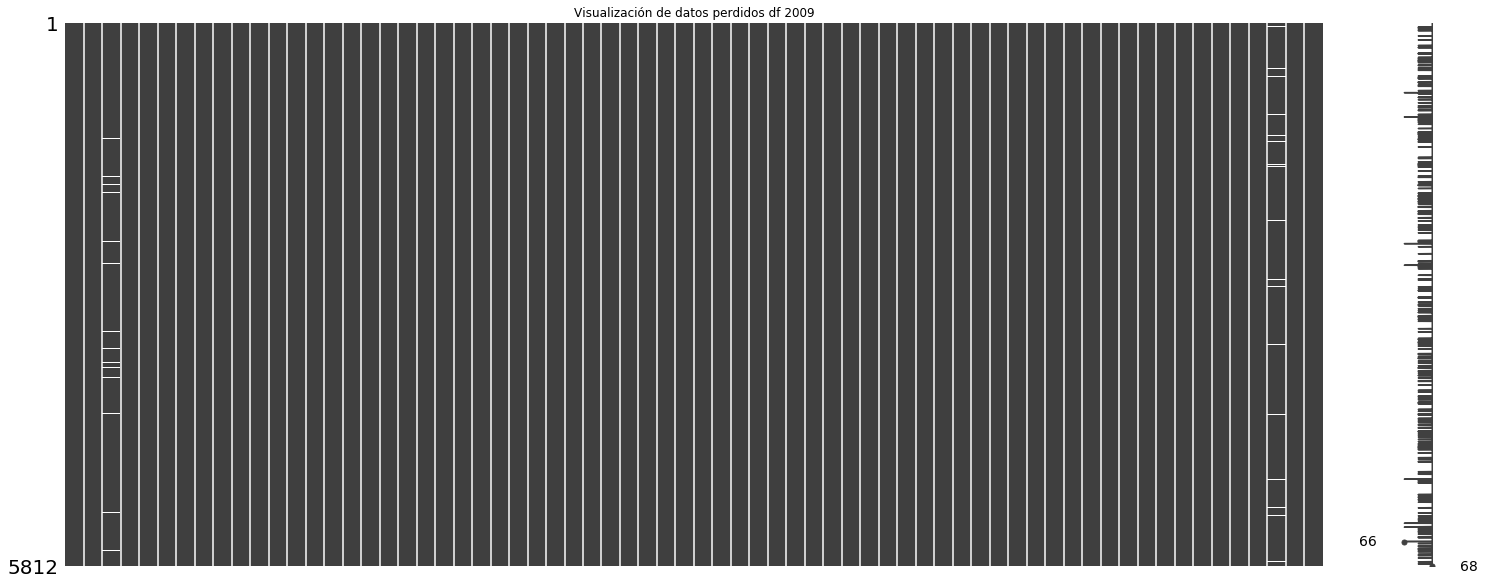

In [21]:
plt.figure(figsize=(4,4))
msngo.matrix(df_2009)
plt.title('Visualización de datos perdidos df 2009')

Text(0.5, 1.0, 'Visualización de datos perdidos df 2010')

<Figure size 288x288 with 0 Axes>

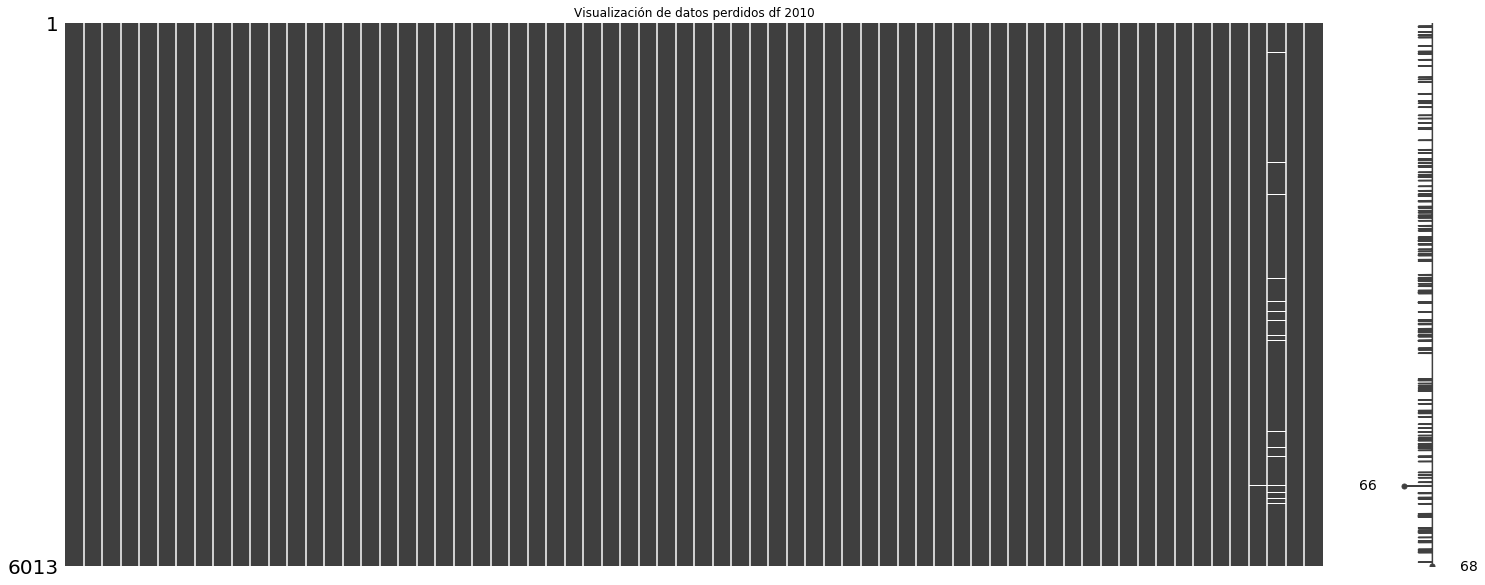

In [22]:
plt.figure(figsize=(4,4))
msngo.matrix(df_2010)
plt.title('Visualización de datos perdidos df 2010')

#### 12.- Identificación de columnas con datos perdidos y eliminación de éstos

In [23]:
col_2009_aux=[]
col_2010_aux=[]

col_2009_aux=missing_values(df_2009,0)
col_2010_aux=missing_values(df_2010,0)

Valores de datos perdidos
----------------------------
- trhsloc :  0.0353
- sector :  0.02
----------------------------
Valores de datos perdidos
----------------------------
- city :  0.0002
- sector :  0.0288
----------------------------


In [24]:
df_2009_new = df_2009.dropna()
df_2010_new = df_2010.dropna()

In [25]:
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009_new.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009_new.shape[0],df_2010.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5499, Cantidad de columnas: 68
DATAFRAME 2010: Cantidad de Registros:5499, Cantidad de columnas: 68


#### 13.- Identificación de columnas que presentan diferencias en sus valores

In [26]:
lista_aux=[]
for i,c in df_2010_new.iteritems():
    if(df_2010_new[i].nunique()!=df_2009_new[i].nunique()):
        lista_aux.append(i)
lista_aux

['haircolr', 'eyecolor', 'meters']

In [27]:
df_2009_new['haircolr'].unique()

array(['BK', 'BR', 'BL', 'BA', 'SP', 'ZZ', 'XX', 'GY', 'RA', 'DY', 'SN'],
      dtype=object)

In [28]:
df_2010_new['haircolr'].unique()

array(['BR', 'BK', 'ZZ', 'BL', 'BA', 'XX', 'SP', 'GY', 'DY', 'RA'],
      dtype=object)

In [29]:
df_2009_new['eyecolor'].unique()

array(['BR', 'BK', 'GR', 'BL', 'DF', 'HA', 'XX', 'Z', 'GY', 'MA'],
      dtype=object)

In [30]:
df_2010_new['eyecolor'].unique()

array(['GR', 'BR', 'BK', 'HA', 'BL', 'GY', 'XX', 'Z', 'MA', 'DF', 'VI'],
      dtype=object)

#### 14.- Seleccion de registros que contengan datos comunes (en ambos dataframe) de los atributos identificados (haircolr, eyecolor)

In [31]:
n=np.intersect1d(df_2009.haircolr,df_2010.haircolr)
df_2009_new = df_2009_new[df_2009_new.haircolr.isin(n)]
df_2010_new = df_2010_new[df_2010_new.haircolr.isin(n)]
n

array(['BA', 'BK', 'BL', 'BR', 'DY', 'GY', 'RA', 'SP', 'XX', 'ZZ'],
      dtype=object)

In [32]:
n=np.intersect1d(df_2009.eyecolor,df_2010.eyecolor)
df_2009_new = df_2009_new[df_2009_new.eyecolor.isin(n)]
df_2010_new = df_2010_new[df_2010_new.eyecolor.isin(n)]
n

array(['BK', 'BL', 'BR', 'DF', 'GR', 'GY', 'HA', 'MA', 'XX', 'Z'],
      dtype=object)

#### 15.- Análisis de los dataframes luego del preprocesamiento

- Tipo de datos datos

In [33]:
lista_object_2009,lista_numeric_2009  = preproc.typeData(df_2009_new)
print('Type Object')
print('-'*120)
print(lista_object_2009)
print('Type Numeric')
print('-'*120)
print(lista_numeric_2009)

Type Object
------------------------------------------------------------------------------------------------------------------------
['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector']
Type Numeric
--------------------------------------------------------------------------------------------------

In [34]:
lista_object_2010,lista_numeric_2010  = preproc.typeData(df_2010_new)
print('Type Object')
print('-'*120)
print(lista_object_2010)
print('Type Numeric')
print('-'*120)
print(lista_numeric_2010)

Type Object
------------------------------------------------------------------------------------------------------------------------
['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector']
Type Numeric
--------------------------------------------------------------------------------------------------

- Columnas y registros en los Dataframe

In [35]:
df_two_year = pd.concat([df_2009_new,df_2010_new])
print('DATAFRAME 2009: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009_new.shape[0],df_2009.shape[1]))
print('DATAFRAME 2010: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_2009_new.shape[0],df_2010.shape[1]))
print('DATAFRAME Unido: Cantidad de Registros:{}, Cantidad de columnas: {}'.format(df_two_year.shape[0],df_two_year.shape[1]))

DATAFRAME 2009: Cantidad de Registros:5496, Cantidad de columnas: 68
DATAFRAME 2010: Cantidad de Registros:5496, Cantidad de columnas: 68
DATAFRAME Unido: Cantidad de Registros:11335, Cantidad de columnas: 68


- comportamiento del vector objetivo luego del preprocesamiento 

In [36]:
print('DATAFRAME 2009 ')
print(df_2009_new['arstmade'].value_counts('%'))
print('-'*50)
print('DATAFRAME 2010')
print(df_2010_new['arstmade'].value_counts('%'))
print('-'*50)

DATAFRAME 2009 
N    0.940502
Y    0.059498
Name: arstmade, dtype: float64
--------------------------------------------------
DATAFRAME 2010
N    0.932694
Y    0.067306
Name: arstmade, dtype: float64
--------------------------------------------------


Text(0.5, 1.0, 'df 2010')

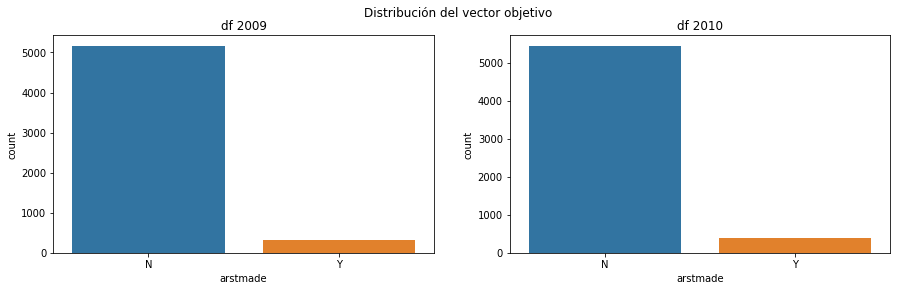

In [37]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
fig.suptitle('Distribución del vector objetivo')
ax1.set_title("df 2009")
sns.countplot(df_2009_new['arstmade'], label = 'Clase', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(df_2010_new['arstmade'], label = 'Clase', ax=ax2)
ax2.set_title("df 2010")

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Análisis luego del Preprocesamiento</strong></u></b> 
    
- Como se puede observar, el preprocesamiento de datos nos ayudo a parear la información presente en ambos Dataframe (tanto número de columnas, tipos de datos y valores de los atributos categóricos.

- Luego de la normalización de atributos y eliminación de columnas (Por presentar una gran cantidad de valores perdidos o diferencias con respecto al otro df), de 111 columnas originales, nos quedamos con 68 luego del preprocesamiento.


- El vector objetivo sigue mostrando una distribucion no balanceada entre las clases (Y, N), predominando en ambos casos los casos donde no se efectua el arresto(N). La frecuencia de esta no cambia significativamente luego del preprocesamiento del los dataframe


**DATAFRAME 2009** 
- **N: 94%**
- **Y: 0.06%**

**DATAFRAME 2010**
- **N: 93.3%**
- **Y: 0,07%**





</div>

***

#### 16.- Binarización de los atributos

In [38]:
df_2009_train = preproc.df_get_dummies(df_2009_new)
df_2010_test = preproc.df_get_dummies(df_2010_new)

In [39]:
print(list(df_2009_train.columns))

['month', 'meters', 'recstat_A', 'inout_O', 'trhsloc_P', 'trhsloc_T', 'typeofid_P', 'typeofid_R', 'typeofid_V', 'explnstp_Y', 'othpers_Y', 'arstmade_Y', 'sumissue_Y', 'offunif_Y', 'frisked_Y', 'searched_Y', 'contrabn_Y', 'pistol_Y', 'riflshot_Y', 'knifcuti_Y', 'othrweap_Y', 'pf_hands_Y', 'pf_wall_Y', 'pf_grnd_Y', 'pf_drwep_Y', 'pf_ptwep_Y', 'pf_baton_Y', 'pf_hcuff_Y', 'pf_pepsp_Y', 'pf_other_Y', 'radio_Y', 'ac_rept_Y', 'ac_inves_Y', 'rf_vcrim_Y', 'rf_othsw_Y', 'ac_proxm_Y', 'rf_attir_Y', 'cs_objcs_Y', 'cs_descr_Y', 'cs_casng_Y', 'cs_lkout_Y', 'rf_vcact_Y', 'cs_cloth_Y', 'cs_drgtr_Y', 'ac_evasv_Y', 'ac_assoc_Y', 'cs_furtv_Y', 'rf_rfcmp_Y', 'ac_cgdir_Y', 'rf_verbl_Y', 'cs_vcrim_Y', 'cs_bulge_Y', 'cs_other_Y', 'ac_incid_Y', 'ac_time_Y', 'rf_knowl_Y', 'ac_stsnd_Y', 'ac_other_Y', 'sb_hdobj_Y', 'sb_outln_Y', 'sb_admis_Y', 'sb_other_Y', 'rf_furt_Y', 'rf_bulg_Y', 'sex_M', 'sex_Z', 'race_B', 'race_I', 'race_P', 'race_Q', 'race_U', 'race_W', 'race_Z', 'haircolr_BK', 'haircolr_BL', 'haircolr_BR',

#### 17.- Muestra de entrenamiento y validación

In [40]:
X_train = df_2009_train.drop(columns = 'arstmade_Y')
y_train = df_2009_train['arstmade_Y']
X_test= df_2010_test.drop(columns = ['arstmade_Y'])
y_test= df_2010_test['arstmade_Y']

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,roc_curve

from sklearn.metrics import roc_auc_score


#### 18.- Obtención de modelos

### Modelo 1: AdaBoostClassifier

In [42]:

param_grid= {'n_estimators':[50, 100, 500, 1000, 2000], 
                               'learning_rate': [0.01, 0.1,0.5]}

adaboost_grid = GridSearchCV(AdaBoostClassifier(),
                                   param_grid = param_grid,cv=2).fit(X_train, y_train)


In [43]:
adaboost_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=500, random_state=None)

In [44]:
y_hat = adaboost_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5446
           1       0.83      0.57      0.68       393

    accuracy                           0.96      5839
   macro avg       0.90      0.78      0.83      5839
weighted avg       0.96      0.96      0.96      5839



### Modelo 2: GradientBoostingClassifier

In [45]:
param_grid2 = {'n_estimators':[50, 100, 500, 1000, 2000], 
                               'learning_rate': [0.01, 0.1,0.5], 
                               'subsample': np.linspace(0.1, 0.9, 3, endpoint=True, dtype=float),}

gradient_boost_grid = GridSearchCV(GradientBoostingClassifier(),param_grid = param_grid2,cv=2).fit(X_train, y_train)

C:\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
y_hat = gradient_boost_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5446
           1       0.86      0.62      0.72       393

    accuracy                           0.97      5839
   macro avg       0.92      0.80      0.85      5839
weighted avg       0.97      0.97      0.96      5839



***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Elección de un modelo</strong></u></b> 
    
- Como se puede observar, el modelo que presento mejores métricas fue GradientBoostingClassifier, donde el f1-score de la clase 1 (Se efectua arresto) es de .72

</div>

***

#### 19.- Curva ROC del modelo con mejor métrica (Gradient Boosting)

In [47]:
auc_score = roc_auc_score(y_test, y_hat)
auc_score

0.8042156205876059

In [48]:
y_pred_prob=gradient_boost_grid.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.01451956, 0.02393707, 0.04183315, ..., 0.01519836, 0.02726366,
       0.02411589])

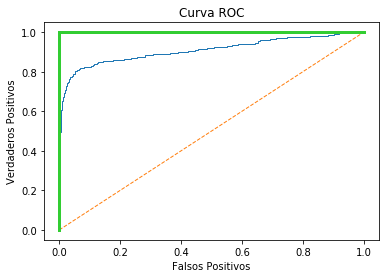

In [49]:
false_positive, true_positive, threshold = roc_curve(y_test,y_pred_prob)
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Elección de un modelo</strong></u></b> 
    
- La curva roc nos muestra que el modelo predice en un 30% por sobre una predicción aleatoria.

</div>

***

#### 20.- Importancia Relativa:  30 variables mas influyentes

In [50]:
def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1][:30]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(names)), tmp_importance[sort_importance])
    plt.yticks(range(len(names)), names, rotation=0)
    return names;


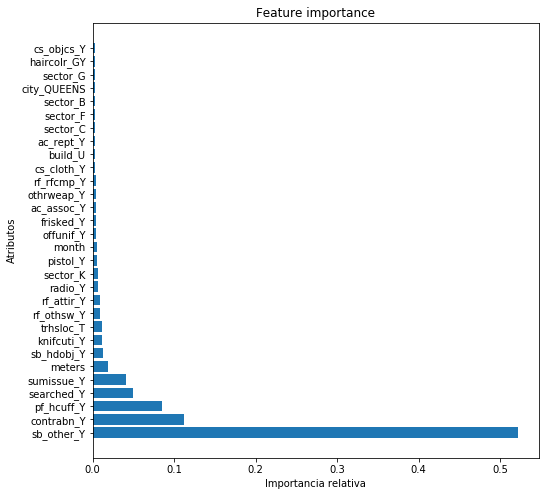

In [51]:
plt.figure(figsize=(8,8))
names=plot_importance(gradient_boost_grid.best_estimator_, df_2009_train.drop(columns='arstmade_Y').columns)
plt.xlabel("Importancia relativa")
plt.ylabel('Atributos')

df_2009_inter_top30=df_2009_train.loc[:,names]
df_2010_inter_top30=df_2010_test.loc[:,names]

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Importancia de los Atributos (30 mas influyentes)</strong></u></b> 
    
- De los 30 atributos, BasisOfSearch(Sb_other), ContrabandSuspect(contrabn), HandCuffsUsed(Pf_Hcuff),'searched y sumissue presentaron un mayor porcentaje de importancia relativa.

</div>

***

#### 21.- Modelos a partir de datos los dataframes con los 30 atributos con mayor importacia

In [53]:
X_train2 = df_2009_inter_top30
y_train2 = df_2009_train['arstmade_Y']
X_test2= df_2010_inter_top30
y_test2= df_2010_test['arstmade_Y']

param_grid3 = {'n_estimators':[50, 100, 500, 1000], 
                               'learning_rate': [0.001,0.01, 0.1], 
                               'subsample': np.linspace(0.1, 0.9, 3, endpoint=True, dtype=float),}

gradient_boost_grid2 = GridSearchCV(GradientBoostingClassifier(),param_grid = param_grid3,cv=2).fit(X_train2, y_train2)

In [54]:
gradient_boost_grid2 .best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
y_hat2 = gradient_boost_grid2.best_estimator_.predict(X_test2)
print(classification_report(y_test2, y_hat2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5446
           1       0.85      0.62      0.72       393

    accuracy                           0.97      5839
   macro avg       0.91      0.81      0.85      5839
weighted avg       0.97      0.97      0.96      5839



***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Modelo con los 30 mas influyentes</strong></u></b> 
    
- Como se puede observar para GradientBoostingClassifier con los 30 atributos mas influyentes el f1-score de la clase 1 (Se efectua arresto) se mantiene en .72, lo cual es muy bueno, ya que redujimos los atributos pero manteniendo el poder predictivo del modelo.

</div>

***

#### 22.-  probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza

In [56]:
aux=gradient_boost_grid.best_estimator_.predict_proba(X_test)
aux

array([[0.98548044, 0.01451956],
       [0.97606293, 0.02393707],
       [0.95816685, 0.04183315],
       ...,
       [0.98480164, 0.01519836],
       [0.97273634, 0.02726366],
       [0.97588411, 0.02411589]])

In [57]:
lista_prob =[]
for i in aux:
    lista_prob.append(i[1])
lista_prob
df_2010_new['Probabilidad'] = pd.Series(lista_prob)
df_2010_new.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,frisked,...,sex,race,haircolr,eyecolor,build,city,sector,month,meters,Probabilidad
0,1,O,P,P,Y,N,N,N,N,Y,...,M,W,BR,GR,T,MANHATTAN,G,11,1.82880,0.014520
1,1,I,T,V,Y,N,N,N,Y,N,...,M,B,BK,BR,M,BRONX,E,9,1.85928,0.023937
2,1,I,T,V,Y,N,N,N,Y,Y,...,M,B,BK,BR,M,MANHATTAN,B,6,1.85928,0.041833
3,1,O,P,V,Y,N,N,N,Y,Y,...,M,Q,BK,BR,M,QUEENS,J,11,1.85928,0.022931
4,1,I,T,P,Y,N,N,N,Y,Y,...,M,Q,ZZ,BR,T,MANHATTAN,C,3,1.55448,0.122458


In [73]:
df_state = pd.DataFrame(df_2010_new.groupby(['city','race','sex']).mean()['Probabilidad'].sort_values(ascending=False))
df_state.sort_values(by="Probabilidad").tail(5)

Probabilidad
city      race sex              
MANHATTAN B    Z        0.236458
          Q    Z        0.317383
STATEN IS Z    Z        0.334613
BROOKLYN  P    F        0.584326
MANHATTAN I    M        0.737972

In [68]:
df_state.sort_values(by=['city','sex','race','Probabilidad'], inplace=True)
df_state.head(5)

Probabilidad
city  race sex              
BRONX B    F        0.017374
      P    F        0.013959
      Q    F        0.101979
      W    F        0.051331
      Z    F        0.024000

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b>La probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza </b> 
    
- Como se puede observar tiene una mayor probabilidad de ser arrestado si esta en Manhattan siendo Mujer American Indian/AlaskaNative(I) o en Brooklyn siendo mujer y BlackHispanic(P), con una probabilidad de 74% y 58% Respectivamente

</div>

***

## Sección 2

#### 1.- Se crea  nuevo atributo como vector objetivo que indique cuándo hubo violencia o no

In [74]:
df_2009_new['isViolent'] = np.where((df_2009_new['pf_hands']=='Y')|(df_2009_new['pf_wall'] =='Y')| (df_2009_new['pf_grnd']=='Y')| (df_2009_new['pf_drwep']=='Y')| (df_2009_new['pf_baton']=='Y')|(df_2009_new['pf_hcuff']=='Y')| (df_2009_new['pf_pepsp']=='Y')| (df_2009_new['pf_other']=='Y'),'Y','N')

#### 2.- Analisis Exploratorio

In [75]:
df_2009_new['isViolent'].value_counts('%')

N    0.753821
Y    0.246179
Name: isViolent, dtype: float64

#### 3.- Quitamos aquellas variables que permiten determinar directamente si hubo violencia o no

In [76]:
df_2009_new.drop(columns=['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other'], inplace=True)

#### 3.- Binarización de los atributos

In [77]:
df_2009_train2 = preproc.df_get_dummies(df_2009_new)

In [78]:
df_2009_train2.shape

(5496, 109)

#### 4.- Distrubución de clase 0 y 1 en el atributo de violencia - año 2009

In [85]:
df_2009_train2['isViolent_Y'].value_counts('%')

0    0.753821
1    0.246179
Name: isViolent_Y, dtype: float64

#### 5.- Distrubución de clase 0 y 1 en el atributo de violencia - año 2010

In [80]:
df_2010_new['isViolent'] = np.where((df_2010_new['pf_hands']=='Y')|(df_2010_new['pf_wall'] =='Y')| (df_2010_new['pf_grnd']=='Y')| (df_2010_new['pf_drwep']=='Y')| (df_2010_new['pf_baton']=='Y')|(df_2010_new['pf_hcuff']=='Y')| (df_2010_new['pf_pepsp']=='Y')| (df_2010_new['pf_other']=='Y'),'Y','N')
df_2010_new.drop(columns=['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other'], inplace=True)
df_2010_train2 = preproc.df_get_dummies(df_2010_new)
df_2010_train2['isViolent_Y'].value_counts('%')

0    0.760575
1    0.239425
Name: isViolent_Y, dtype: float64

#### 6.- Gráficos de clase 0 y 1 en el vector objetivo - años 2009 y 2010

Text(0.5, 1.0, 'df 2010')

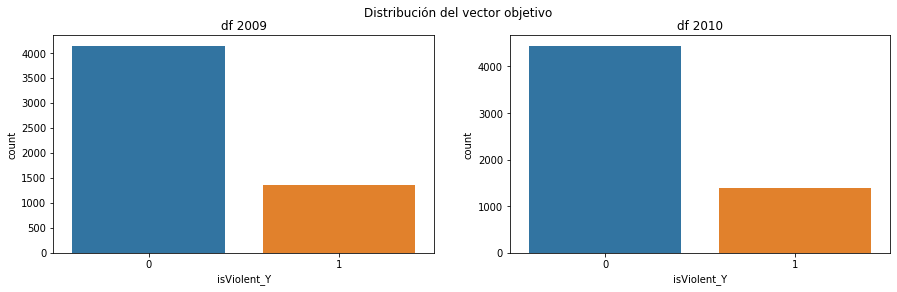

In [81]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
fig.suptitle('Distribución del vector objetivo')
ax1.set_title("df 2009")
sns.countplot(df_2009_train2['isViolent_Y'], label = 'Clase', ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(df_2010_train2['isViolent_Y'], label = 'Clase', ax=ax2)
ax2.set_title("df 2010")

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b>La probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza </b> 
    
- Se puede observar que nuevamente existe un desbalance entre las clases para ambos set de datos
</div>

***

#### 7.- Modelamiento - Muestra de entrenamiento y validación

In [89]:
X_train2 = df_2009_train2.drop(columns = 'isViolent_Y')
y_train2 = df_2009_train2['isViolent_Y']
X_test2= df_2010_train2.drop(columns = ['isViolent_Y','Probabilidad'])
y_test2= df_2010_train2['isViolent_Y']

#### 8.- Obtención de modelos

### Modelo 1: GradientBoostingClassifier

In [90]:
param_grid2 = {'learning_rate': [0.05,0.1,0.5],'n_estimators': [100, 500, 1000], 'subsample': [0.1,0.5,0.9]}

gradient_boost_grid2 = GridSearchCV(GradientBoostingClassifier(),param_grid = param_grid2,cv=2).fit(X_train2, y_train2)

In [91]:
y_hat = gradient_boost_grid2.best_estimator_.predict(X_test2)
print(classification_report(y_test2, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4441
           1       0.55      0.24      0.34      1398

    accuracy                           0.77      5839
   macro avg       0.67      0.59      0.60      5839
weighted avg       0.74      0.77      0.74      5839



### Modelo 2: MultinomialNB

In [92]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
y_hat = clf.predict(X_test2)
print(classification_report(y_test2, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4441
           1       0.49      0.39      0.44      1398

    accuracy                           0.76      5839
   macro avg       0.66      0.63      0.64      5839
weighted avg       0.74      0.76      0.75      5839



### Modelo 3: LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
modellr= LogisticRegression(random_state=11238).fit(X_train2, y_train2)
y_hat = modellr.predict(X_test2)
print(classification_report(y_test2, y_hat))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4441
           1       0.54      0.30      0.38      1398

    accuracy                           0.77      5839
   macro avg       0.67      0.61      0.62      5839
weighted avg       0.74      0.77      0.75      5839



### Modelo 4: RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
max_depth = np.linspace(1,32,15,dtype = int)
n_estimators = [100, 500, 1000, 2000]
max_features= ['sqrt']

modelo_RandomForest = GridSearchCV(RandomForestClassifier(random_state=10),param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'max_features': max_features}, cv = 2, n_jobs = -1)
modelo_RandomForest_fit=modelo_RandomForest.fit(X_train2,y_train2)

In [97]:
modelo_RandomForest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=27, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [98]:
y_pred_v_rand = modelo_RandomForest_fit.best_estimator_.predict(X_test2)
print(classification_report(y_test2, y_pred_v_rand))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      4441
           1       0.55      0.20      0.30      1398

    accuracy                           0.77      5839
   macro avg       0.67      0.57      0.58      5839
weighted avg       0.73      0.77      0.73      5839



- uso de eversampling para equilibrar las muestras

In [99]:
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=12345, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train2, y_train2)
X_test_oversamp, y_test_oversamp = oversampler.fit_sample(X_test2, y_test2)

Using TensorFlow backend.


### Modelo 5: RandomForestClassifier (over_sampling )

In [100]:
from sklearn.ensemble import RandomForestClassifier
max_depth = np.linspace(1,32,15,dtype = int)
max_features= ['sqrt','log2',None]
modelo_RandomForest = GridSearchCV(RandomForestClassifier(random_state=10),param_grid = {'max_depth':max_depth,'max_features': max_features}, cv =2, n_jobs = -1)
modelo_RandomForest_fit=modelo_RandomForest.fit(X_train_oversamp,y_train_oversamp)

In [101]:
y_pred_v_rand = modelo_RandomForest_fit.best_estimator_.predict(X_test_oversamp)
print(classification_report(y_test_oversamp, y_pred_v_rand))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      4441
           1       0.83      0.71      0.77      4441

    accuracy                           0.78      8882
   macro avg       0.79      0.78      0.78      8882
weighted avg       0.79      0.78      0.78      8882



***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Elección de modelos para predecir si hubo violencia o no </strong></u></b> 
    
- Como se puede observar el mejor desempeño se da en el modelo de RandomForest con oversampling,donde el f1-score de la clase 1 (Hubo violencia es) de 77%


</div>

***

#### 9.- Serializamos los 2 mejores modelos

In [105]:
import pickle
pickle.dump(modelo_RandomForest, open('z-ju_modelo-1.sav','wb'))
pickle.dump(clf, open('z-ju_modelo-2.sav','wb'))

***
- Comentarios:

<div class="alert alert-success" role="alert">
<b><u><strong>Conclusiones </strong></u></b> 
    
- Al estar desbalanceadas las clases, el modelo por defecto predice la clase 1 (minoritaría) con una menor precisión, por tanto en este caso utilizar herramientas como oversampling pueden ser de gran ayuda para mejorar el desempeño de un modelo. En este caso no es recomendable utilizar undersampling ya que nos quedaríamos con muy pocos datos para trabajar el modelo.

</div>

***